# Homework 1:  Regression Analysis Using Supervised Learning - Oakland A's Case
### Sean Olson

In [1]:
## Import Libraries
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew

%matplotlib inline

# import statistical visualization library
import seaborn as sns

# import supervised learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV

# import regression libraries
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report, roc_auc_score, roc_curve

# suppress warnings
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load data into pandas dataframe

#data = pd.read_excel('/Users/seanolson/OneDrive/Documents/UNC Chapel Hill/Kenan-Flagler Business School/KFBS Courses/MBA705 Business Modeling/Week 1/Oakland-Data.xlsx', sheet_name = 'Regression Model')
#data = pd.read_excel('C:/Users/600795/Downloads/Customer+Transaction+Data.xlsx', sheet_name = 'Data')
data = pd.read_excel('Oakland-Data.xlsx', sheet_name = 'Regression Model')
display(data.head())

,Date,No. of Tickets Sold,DH,Opposing Team,Position,Games Behind,Day of Week,Average Temp.,Time of Game,Promotions,Nobel,Precipitation,Televised
0,1998-04-10 00:00:00,24415,0,2,5,1,4,57,2,0,0,0,0
1,1998-04-11 00:00:00,5729,0,2,3,1,5,66,2,0,0,0,0
2,1998-04-12 00:00:00,5783,0,2,7,1,6,64,1,0,0,0,0
3,1998-04-13 00:00:00,6300,0,2,5,1,7,62,1,0,0,0,0
4,1998-04-14 00:00:00,5260,0,1,7,2,1,60,2,1,1,0,0


In [3]:
# check on missing values per column
print("Check Nulls - Main Dataframe")
print("----------------------------")
print(data.isnull().sum())

Check Nulls - Main Dataframe
----------------------------
Date                   0
No. of Tickets Sold    0
DH                     0
Opposing Team          0
Position               0
Games Behind           0
Day of Week            0
Average Temp.          0
Time of Game           0
Promotions             0
Nobel                  0
Precipitation          0
Televised              0
dtype: int64


## Linear Regression Question B:  Spending Behavior

In [4]:
# create dummy columns
lin_data = pd.get_dummies(data = data, columns = ['Opposing Team', 'Day of Week', 'Time of Game'])

# rename columns
lin_data = lin_data.rename(columns = {'Opposing Team_1': 'Seattle', 'Opposing Team_2': 'Minnesota', 'Opposing Team_3': 'California',
                                      'Opposing Team_4': 'Yankees', 'Opposing Team_5': 'Detroit', 'Opposing Team_6': 'Milwaukee',
                                      'Opposing Team_7': 'Toronto', 'Opposing Team_8': 'White Sox', 'Opposing Team_9': 'Boston',
                                      'Opposing Team_10': 'Baltimore', 'Opposing Team_11': 'Cleveland', 'Opposing Team_12': 'Texas',
                                      'Opposing Team_13': 'Kansas City', 'Day of Week_1': 'Monday', 'Day of Week_2': 'Tuesday',
                                      'Day of Week_3': 'Wednesday', 'Day of Week_4': 'Thursday', 'Day of Week_5': 'Friday',
                                      'Day of Week_6': 'Saturday', 'Day of Week_7': 'Sunday', 'Time of Game_1': 'Day Game',
                                      'Time of Game_2': 'Night Game'})

display(lin_data.head())

,Date,No. of Tickets Sold,DH,Position,Games Behind,Average Temp.,Promotions,Nobel,Precipitation,Televised,...,Kansas City,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Day Game,Night Game
0,1998-04-10 00:00:00,24415,0,5,1,57,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1998-04-11 00:00:00,5729,0,3,1,66,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1998-04-12 00:00:00,5783,0,7,1,64,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1998-04-13 00:00:00,6300,0,5,1,62,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1998-04-14 00:00:00,5260,0,7,2,60,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


#### No nulls present from previous check, moving on to build density distribution to determine skewness of the data
#### Check skewness of the target (spend) data using Python's scipy library

Skewness: 2.2733875036867355


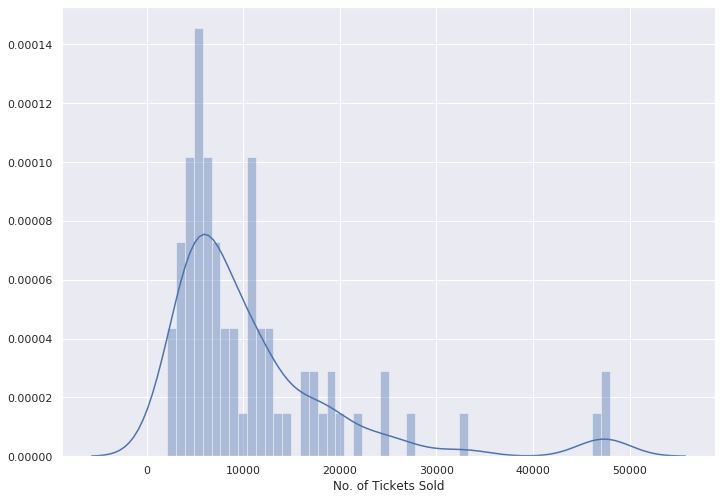

In [5]:
skewness = skew(lin_data['No. of Tickets Sold'])
print('Skewness: {}'.format(skewness))

## Data Visualization
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(lin_data['No. of Tickets Sold'], bins = 50)
plt.show()

#### The data is highly skewed, more specifically right skewed.  Data will have to be normalized, choosing to use Logarithm transformation because it is positively skewed data

In [6]:
# Create natural log transform of spend column
lin_data['TixSold_ln'] = np.log(lin_data['No. of Tickets Sold'])
display(lin_data.head())

,Date,No. of Tickets Sold,DH,Position,Games Behind,Average Temp.,Promotions,Nobel,Precipitation,Televised,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Day Game,Night Game,TixSold_ln
0,1998-04-10 00:00:00,24415,0,5,1,57,0,0,0,0,...,0,0,0,1,0,0,0,0,1,10.102953
1,1998-04-11 00:00:00,5729,0,3,1,66,0,0,0,0,...,0,0,0,0,1,0,0,0,1,8.653296
2,1998-04-12 00:00:00,5783,0,7,1,64,0,0,0,0,...,0,0,0,0,0,1,0,1,0,8.662678
3,1998-04-13 00:00:00,6300,0,5,1,62,0,0,0,0,...,0,0,0,0,0,0,1,1,0,8.748305
4,1998-04-14 00:00:00,5260,0,7,2,60,1,1,0,0,...,1,0,0,0,0,0,0,0,1,8.567886


### Check skewness and distribution again

Skewness of Ln: 0.4503868431081989


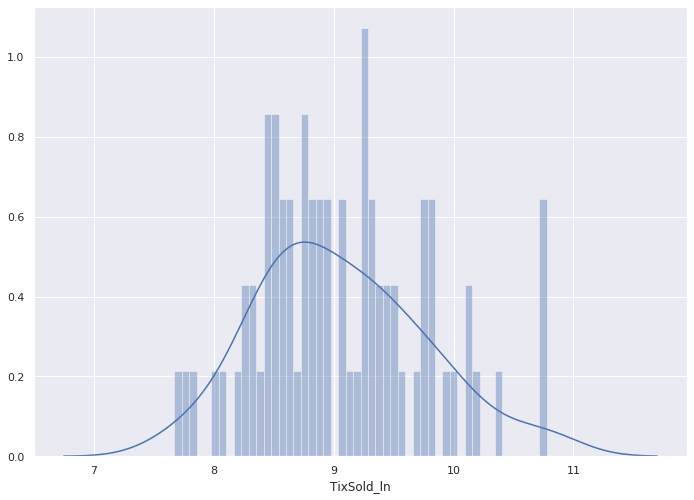

In [7]:
skewness = skew(lin_data['TixSold_ln'])
print('Skewness of Ln: {}'.format(skewness))

## Data Visualization
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(lin_data['TixSold_ln'], bins = 50)
plt.show()

#### The distribution is now mostly normalized, can proceed with the rest of the linear regression

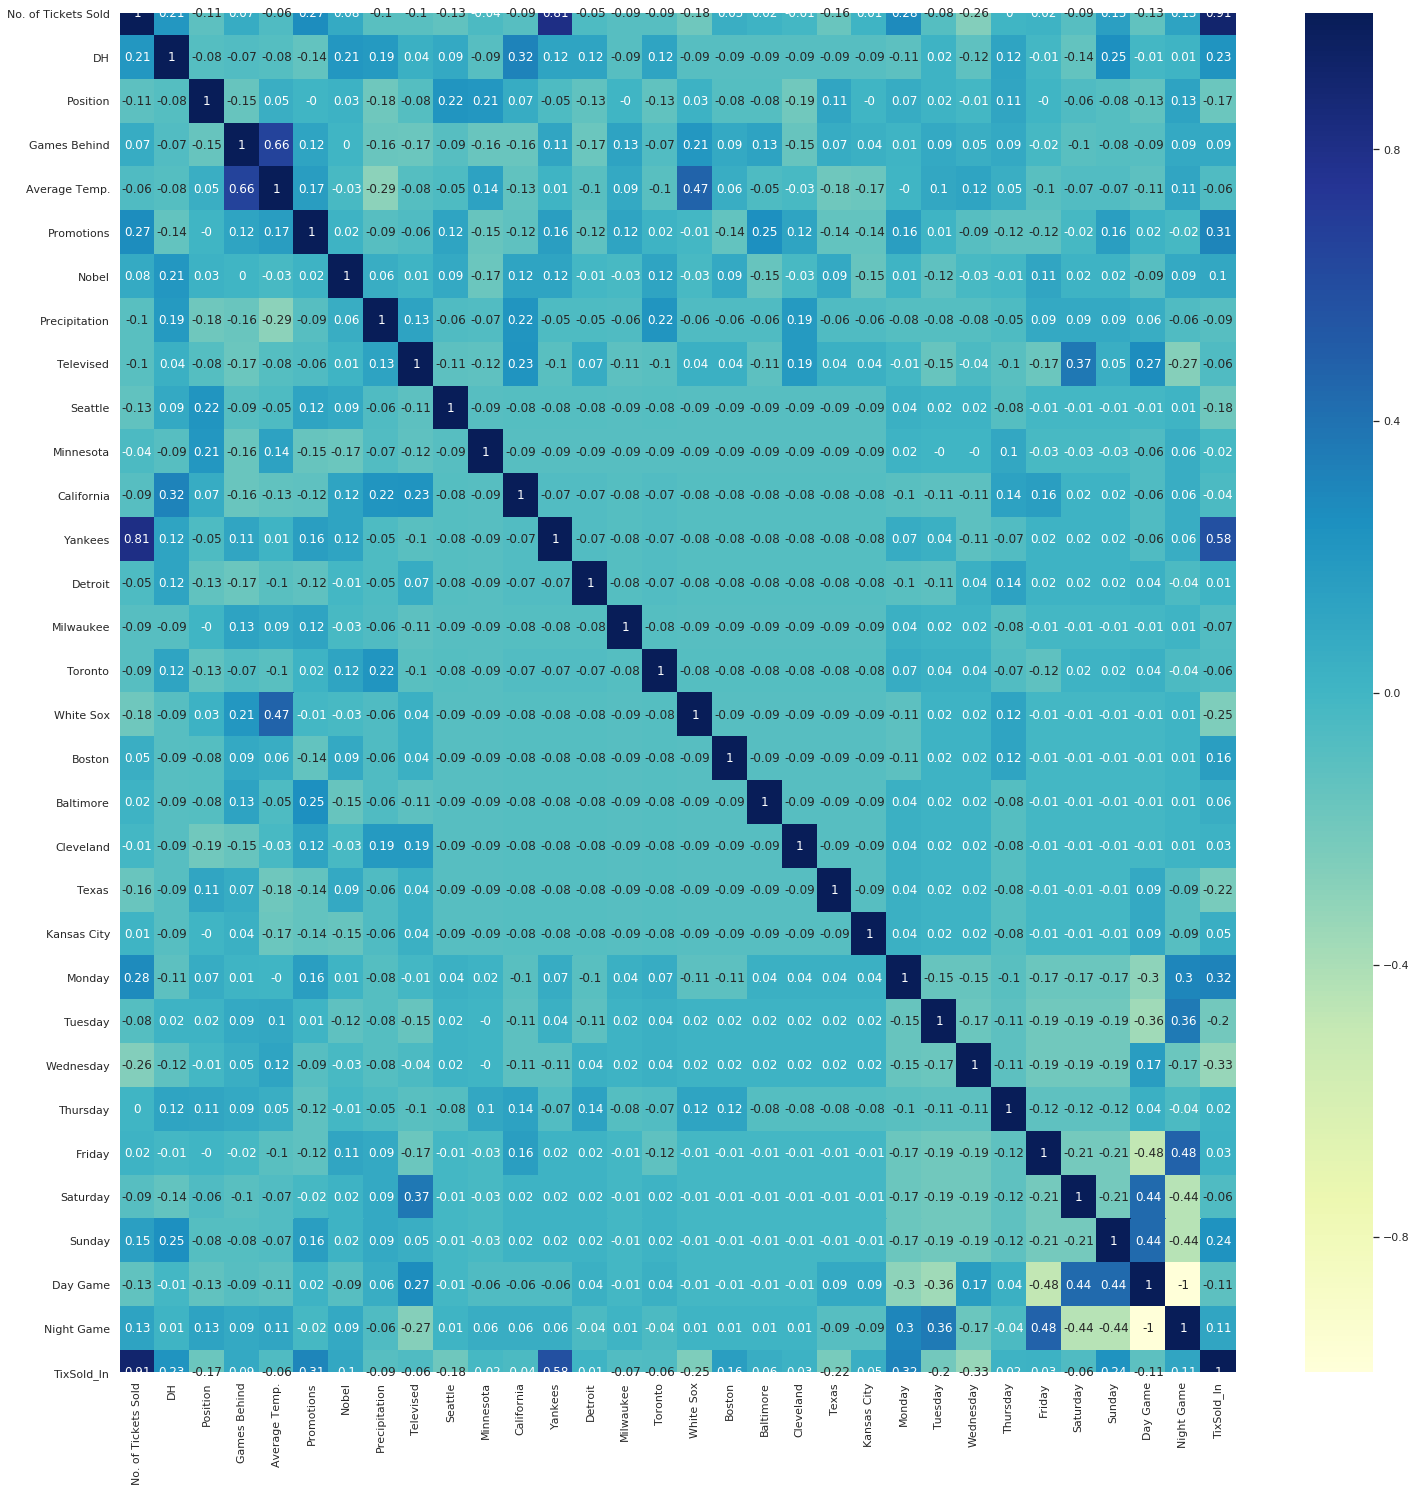

In [10]:
## Correlation Matrix
correlation_matrix = lin_data.corr().round(2)
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data = correlation_matrix, annot = True, ax = ax, cmap="YlGnBu")

#### From the correlation matrix above  *TixSold_ln* is more correlated to *DH*, *Position*, *Promotions*, *Yankees*, *Seattle*, *White Sox*, *Boston*, *Texas*, *Monday*, *Tuesday*, *Wednesday*, *Thursday*, *Friday*, *Saturday*, *Sunday*, *Night Game*.  
#### Plot *TixSold_ln* against the non-binary independent variables to determine the relationship.

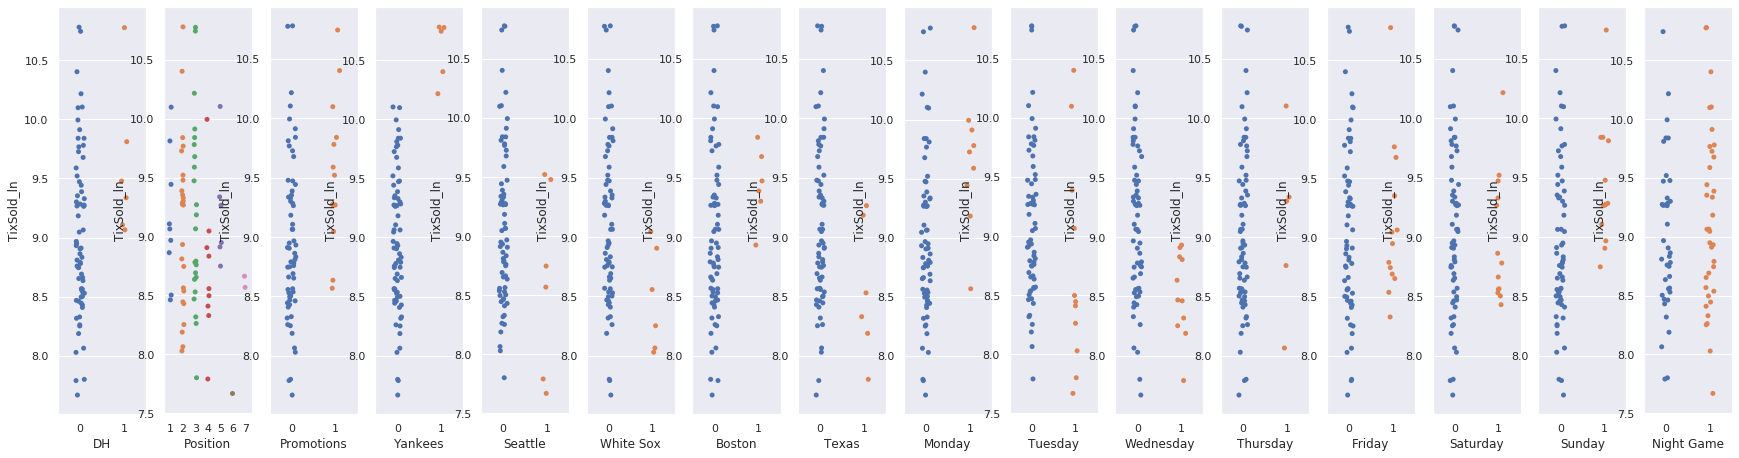

In [13]:
# set figure size
plt.figure(figsize = (30, 7.5))

# set features (independent variables)
features = ['DH', 'Position', 'Promotions', 'Yankees', 'Seattle', 'White Sox', 'Boston', 'Texas', 'Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Night Game']

# set target (dependent variable)
target = lin_data['TixSold_ln']

# generate plots
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = lin_data[col]
    y = target
    sns.stripplot(x, y, jitter = True)

#### Now ready to prepare the data for training in the supervised learning environment

In [15]:
# create x and y variables for the regression model, the X variables are the independent variables (features) defined above
# the Y variable is the target or dependent variable
Xr = pd.DataFrame(np.c_[lin_data['DH'], lin_data['Position'], lin_data['Promotions'], lin_data['Yankees'],
                        lin_data['Seattle'], lin_data['White Sox'], lin_data['Boston'], lin_data['Texas'],
                        lin_data['Monday'], lin_data['Tuesday'], lin_data['Wednesday'], lin_data['Thursday'],
                        lin_data['Friday'], lin_data['Saturday'], lin_data['Sunday'], lin_data['Night Game']],
                  columns = ['DH', 'Position', 'Promotions', 'Yankees', 'Seattle', 'White Sox', 'Boston', 'Texas',
                             'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
                             'Night Game'])
Yr = lin_data['TixSold_ln']

In [65]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr, Yr, test_size = 0.15, random_state=5)
print(Xr_train.shape)
print(Xr_test.shape)
print(Yr_train.shape)
print(Yr_test.shape)

(63, 16)
(12, 16)
(63,)
(12,)


In [66]:
# train the model using scikit-learn's LinearRegression function
lin_model = LinearRegression()
lin_model.fit(Xr_train, Yr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# evaluate the model on the training set
yr_train_predict = lin_model.predict(Xr_train)
rmse = (np.sqrt(mean_squared_error(Yr_train, yr_train_predict)))
r2 = r2_score(Yr_train, yr_train_predict)

print('Training set model performance')
print('------------------------------')
print('Training RMSE: {}'.format(rmse))
print('Training R2: {}'.format(r2))

# evaluate the model on the testing set
yr_test_predict = lin_model.predict(Xr_test)
# root mean square error for the testing set
rmse_test = (np.sqrt(mean_squared_error(Yr_test, yr_test_predict)))
# r-squared value for the testing set
r2_test = r2_score(Yr_test, yr_test_predict)
# mean absolute error for testing set
mae_test = mean_absolute_error(Yr_test, yr_test_predict)

print('')
print('Testing set model performance')
print('-----------------------------')
print('Testing RMSE: {}'.format(rmse_test))
print('Testing R2: {}'.format(r2_test))
print('Testing MAE: {}'.format(mae_test))

# perform tests of significance against the model
# first append the intercept and the independents coefficients
params = np.append(lin_model.intercept_,lin_model.coef_)

# create a placeholder array to determine how many tests need to be done
newXr = np.append(np.ones((len(Xr),1)), Xr, axis=1)

# calculate mean sampling error
MSE = (sum((Yr_test-yr_test_predict)**2))/(len(newXr)-len(newXr[0]))

# calculate variance, standard errors, and t-test values
var_b = MSE*(np.linalg.pinv(np.dot(newXr.T,newXr)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/sd_b

# calculate p-values
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newXr)-1))) for i in ts_b]

# round standard errors and t-test outputs
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)

# output results to dictionary and then transform into dataframe
lin_results_dict = {'Independent Variables': ['Intercept', 'DH', 'Position', 'Promotions', 'Yankees', 'Seattle', 'White Sox',
                                              'Boston', 'Texas', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday', 'Night Game'],
                    'Coefficients': [lin_model.intercept_, lin_model.coef_[0], lin_model.coef_[1], lin_model.coef_[2],
                                     lin_model.coef_[3], lin_model.coef_[4], lin_model.coef_[5], lin_model.coef_[6],
                                     lin_model.coef_[7], lin_model.coef_[8], lin_model.coef_[9], lin_model.coef_[10],
                                     lin_model.coef_[11], lin_model.coef_[12], lin_model.coef_[13],
                                     lin_model.coef_[14], lin_model.coef_[15]],
                    'Standard Errors': [sd_b[0], sd_b[1], sd_b[2], sd_b[3], sd_b[4], sd_b[5], sd_b[6], sd_b[7],
                                        sd_b[8], sd_b[9], sd_b[10], sd_b[11], sd_b[12], sd_b[13], sd_b[14], sd_b[15],
                                        sd_b[16]],
                    't values': [ts_b[0], ts_b[1], ts_b[2], ts_b[3], ts_b[4], ts_b[5], ts_b[6], ts_b[7], ts_b[8],
                                 ts_b[9], ts_b[10], ts_b[11], ts_b[12], ts_b[13], ts_b[14], ts_b[15], ts_b[16]],
                    'Probabilities': [p_values[0], p_values[1], p_values[2], p_values[3], p_values[4], p_values[5],
                                      p_values[6], p_values[7], p_values[8], p_values[9], p_values[10], p_values[11],
                                      p_values[12], p_values[13], p_values[14], p_values[15], p_values[16]]}

lin_results = pd.DataFrame.from_dict(lin_results_dict)

# print the results for easy to read analysis
print('')
print('                     Linear Regression Results')
print('--------------------------------------------------------------------')
display(lin_results)
print('--------------------------------------------------------------------')
print('')
print('Model Accuracy')
print('--------------')
print('RMSE: {}'.format(rmse_test))
print('R2: {}'.format(r2_test))
print('MAE: {}'.format(mae_test))

Training set model performance
------------------------------
Training RMSE: 0.3491232524613401
Training R2: 0.7735671789190053

Testing set model performance
-----------------------------
Testing RMSE: 0.29535850578054534
Testing R2: 0.5568765246259009
Testing MAE: 0.25004394270364366

                     Linear Regression Results
--------------------------------------------------------------------


,Independent Variables,Coefficients,Standard Errors,t values,Probabilities
0,Intercept,8.982312,0.042,212.705,0.000000e+00
1,DH,0.303864,0.065,4.647,1.435842e-05
2,Position,-0.064279,0.012,-5.150,2.083759e-06
3,Promotions,0.403250,0.045,8.883,2.773337e-13
4,Yankees,1.311973,0.065,20.135,0.000000e+00
5,Seattle,-0.420615,0.061,-6.852,1.854808e-09
6,White Sox,-0.538281,0.060,-9.017,1.545430e-13
7,Boston,0.503542,0.060,8.326,3.130829e-12
8,Texas,-0.285369,0.061,-4.679,1.274207e-05
9,Monday,0.391344,0.052,7.489,1.193992e-10


--------------------------------------------------------------------

Model Accuracy
--------------
RMSE: 0.29535850578054534
R2: 0.5568765246259009
MAE: 0.25004394270364366


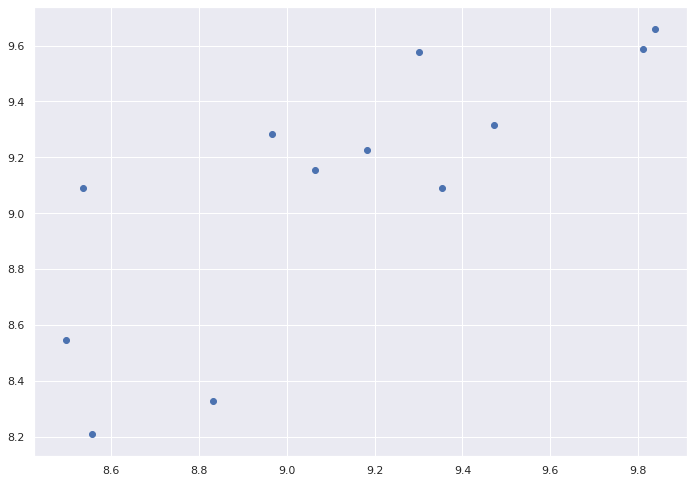

In [68]:
# plot Y_test vs Y_pred
# a straight line indicates an ideal model, everthing else
# look at the MAE and RMSE to determine model accuracy
plt.scatter(Yr_test, yr_test_predict)
plt.show()

## Calculate Exploitation Factor of Nobel (Player)